<a href="https://colab.research.google.com/github/wkt84/emt-python/blob/master/notebook/Python10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 輪郭情報を見る

## 環境の再構築

In [32]:
!pip install pydicom  # pydicomのインストール
import pydicom

In [33]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [34]:
cd '/gdrive/My Drive/python/DICOMdata/'

/gdrive/My Drive/python/DICOMdata


In [0]:
# いつもの表示の設定

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', grid=False)

## DICOM RT Structure Setを読み込もう

In [36]:
rtss = pydicom.dcmread('RS.002445.dcm')
print(rtss)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
# rtss.txtというファイルにデータを書き込む
with open('rtss.txt', 'w') as f:
    print(rtss, file=f)

# シェルコマンドを使ってファイルの中身を表示
!cat rtss.txt

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20181113'
(0008, 0013) Instance Creation Time              TM: '103359.051000'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.4.828000091838.176.20181113103138
(0008, 0020) Study Date                          DA: '20060905'
(0008, 0030) Study Time                          TM: '142544'
(0008, 0050) Accession Number                    SH: '442542.001'
(0008, 0060) Modality                            CS: 'RTSTRUCT'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'ECS144'
(0008, 1030) Study Description                   LO: 'GUIDANCE PLACEMENT THE'
(0008, 103e) Series Description                  LO: 'ARIA RadOnc Structure Sets'
(0008, 10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
# ROI番号とROI名を表示
structures = {}  # ROI番号とROI名を関連付ける辞書を作る

for roi in rtss.StructureSetROISequence:
    structures[roi.ROINumber] = roi.ROIName
    print('ROI number: ', roi.ROINumber, ', ROI name: ', roi.ROIName)

ROI number:  1 , ROI name:  RT LENS
ROI number:  2 , ROI name:  SPINAL_CORD
ROI number:  3 , ROI name:  CORD+5MM
ROI number:  4 , ROI name:  LT_PAROTID
ROI number:  5 , ROI name:  MANDIBLE
ROI number:  7 , ROI name:  RETROPHARYNGEAL
ROI number:  9 , ROI name:  RT OPTIC NERVE
ROI number:  10 , ROI name:  RT SMG
ROI number:  11 , ROI name:  CTV56
ROI number:  12 , ROI name:  BRAIN
ROI number:  13 , ROI name:  LT LENS
ROI number:  14 , ROI name:  BRAINSTEM
ROI number:  15 , ROI name:  GTV70
ROI number:  16 , ROI name:  LT OPTIC NERVE
ROI number:  17 , ROI name:  CTV63
ROI number:  18 , ROI name:  PTV70
ROI number:  19 , ROI name:  PTV63
ROI number:  20 , ROI name:  RT EYE
ROI number:  22 , ROI name:  PTV56
ROI number:  23 , ROI name:  CTV70
ROI number:  25 , ROI name:  LT EYE
ROI number:  26 , ROI name:  RT_PAROTID
ROI number:  29 , ROI name:  LARYNX
ROI number:  30 , ROI name:  BODY
ROI number:  31 , ROI name:  LEFT LUNG
ROI number:  32 , ROI name:  RT LUNG
ROI number:  36 , ROI name:  L

In [39]:
# ROI Contour Sequenceの中身を確認する

print(rtss.ROIContourSequence[0])

(3006, 002a) ROI Display Color                   IS: ['0', '255', '0']
(3006, 0040)  Contour Sequence   4 item(s) ---- 
   (3006, 0016)  Contour Image Sequence   1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.55.3.252317953.12119.1157458294.653.14
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "8"
   (3006, 0050) Contour Data                        DS: ['-24.9', '-174.09', '97.5', '-22.95', '-174.2', '97.5', '-21.97', '-173.34', '97.5', '-21.48', '-171.39', '97.5', '-22.95', '-169.63', '97.5', '-24.9', '-169.64', '97.5', '-26.33', '-171.39', '97.5', '-25.75', '-173.34', '97.5']
   ---------
   (3006, 0016)  Contour Image Sequence   1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID    

In [40]:
for contour in rtss.ROIContourSequence:
    if structures[contour.ReferencedROINumber] == 'PTV70':
        contour_seq = contour.ContourSequence
        print(contour_seq[0])

(3006, 0016)  Contour Image Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.55.3.252317953.12119.1157458294.653.80
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: "20"
(3006, 0050) Contour Data                        DS: ['53.22', '-94.67', '-67.5', '55.18', '-94.68', '-67.5', '57.13', '-94.67', '-67.5', '59.08', '-94.58', '-67.5', '60.48', '-93.26', '-67.5', '61.03', '-92.47', '-67.5', '61.77', '-91.31', '-67.5', '61.58', '-89.36', '-67.5', '61.67', '-87.4', '-67.5', '61.03', '-86.69', '-67.5', '59.8', '-85.45', '-67.5', '59.08', '-84.82', '-67.5', '57.13', '-84.9', '-67.5', '55.18', '-84.74', '-67.5', '53.91', '-85.45', '-67.5', '53.22', '-85.91', '-67.5', '51.9', '-87.4', '-67.5', '51.82', '-89.36', '-67.5', '51.9', '-91.31', '-67.5', '51.82', '-93.26', '-67.5']


In [41]:
# 輪郭点の取り出し
points = [float(point) for contour in contour_seq for point in contour.ContourData]

# x, y, zそれぞれの座標を取り出し
x = [p for p in points[::3]]
y = [p for p in points[1::3]]
z = [p for p in points[2::3]]

print(len(x), len(y), len(z))

5356 5356 5356


### リスト内包表記について

```python
 points = [float(point) for contour in contour_seq for point in contour.ContourData] 
```

は以下と同じ操作です。

```python
points = []
for contour in contour_seq:
    for point in contour.ContourData:
        points.append(float(point))
```

リスト内包表記を用いることで短い文字数で高速な計算が可能です。

ただし過度なリスト内包表記は可読性(読みやすさ)が失われることもあるので注意が必要です。

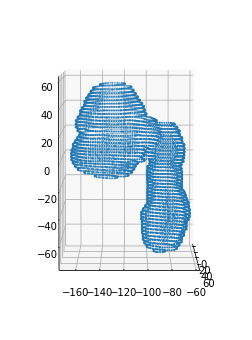

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(x, y, z, s=1)
ax.set_aspect('equal')
ax.view_init(5, 0)

In [0]:
from matplotlib import animation
from IPython.display import HTML

In [44]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(x, y, z, s=1)
ax.set_aspect('equal')

plt.close()

def update(angle):
    ax.view_init(5, angle*10)

anim = animation.FuncAnimation(fig, update, interval=60, frames=35, repeat=True)
HTML(anim.to_jshtml())